# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
#TODO Do samodzielnej implementacji
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

A_invert = np.array([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[-3,  3,  0,  0, -2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[2, -2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0, -3,  3,  0,  0, -2, -1,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  2, -2,  0,  0,  1,  1,  0,  0],
[-3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0,  0,  0,  0,  0],
[0,  0,  0,  0, -3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0],
[9, -9, -9,  9,  6,  3, -6, -3,  6, -6,  3, -3,  4,  2,  2,  1],
[-6,  6,  6, -6, -3, -3,  3,  3, -4,  4, -2,  2, -2, -2, -1, -1],
[2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0],
[-6,  6,  6, -6, -4, -2,  4,  2, -3,  3, -3,  3, -2, -1, -2, -1],
[4, -4, -4,  4,  2,  2, -2, -2,  2, -2,  2, -2,  1,  1,  1,  1],
])

In [2]:
def cubic(image,x_skal,y_skal):
    image = image.astype(np.int16)
    (X,Y) = image.shape
    X_skal = int(X*x_skal)
    Y_skal = int(Y*y_skal)
    new_image = np.zeros((X_skal,Y_skal))
    for i in range(X_skal):
        for j in range(Y_skal):
            i_skal = i/x_skal
            j_skal = j/y_skal

            i1 = int(i_skal)
            j1 = int(j_skal)
            i2 = int(i_skal + 1)
            j2 = int(j_skal + 1)

            if i2>=X:
                i2=i2-1
            if j2>=Y:
                j2=j2-1
            if i1==i2: 
                i1=i1-1
            if j1==j2: 
                j1=j1-1 
            if i1+1>=X:
                i1=-1
            if i2+1>=X:
                i2=-1
            if j1+1>=Y:
                j1=-1
            if j2+1>=Y:
                j2=-1
            
            A=image[i1,j1]
            Ax=(image[i1+1,j1]-image[i1-1,j1])/2
            Ay=(image[i1,j1+1]-image[i1,j1-1])/2
            Axy=(image[i1+1,j1+1]-image[i1-1,j1]-image[i1,j1-1]+image[i1,j1])/4
            
            B=image[i1,j2]
            Bx=(image[i1+1,j2]-image[i1-1,j2])/2
            By=(image[i1,j2+1]-image[i1,j2-1])/2
            Bxy=(image[i1+1,j2+1]-image[i1-1,j2]-image[i1,j2-1]+image[i1,j2])/4

            C=image[i2,j2]
            Cx=(image[i2+1,j2]-image[i2-1,j2])/2
            Cy=(image[i2,j2+1]-image[i2,j2-1])/2
            Cxy=(image[i2+1,j2+1]-image[i2-1,j2]-image[i2,j2-1]+image[i2,j2])/4

            D=image[i2,j1]
            Dx=(image[i2+1,j1]-image[i2-1,j1])/2
            Dy=(image[i2,j1+1]-image[i2,j1-1])/2
            Dxy=(image[i2+1,j1+1]-image[i2-1,j1]-image[i2,j1-1]+image[i2,j1])/4

            x = [A,B,C,D,Ax,Bx,Cx,Dx,Ay,By,Cy,Dy,Axy,Bxy,Cxy,Dxy]
            
            a = (A_invert@np.transpose(x))
            a_reshape=np.reshape(a,(4,4))

            for row in range(4):
                for col in range(4):
                    new_image[i,j] = new_image[i,j] + a_reshape[row,col]*(((i-i1)/(i2-i1))**row)*(((j-j1)/(j2-j1))**col)
    
    return new_image

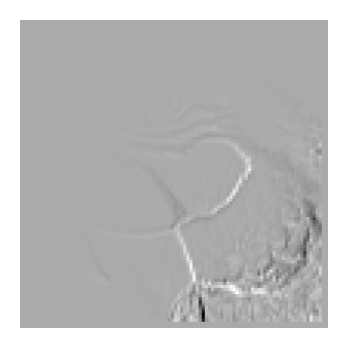

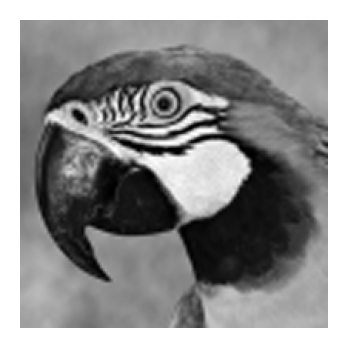

In [3]:
I = cv2.imread('parrot.bmp')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
x=2
y=2

new_I=cubic(I,x,y)
new_I_cv = cv2.resize(I,(int(I.shape[0]*x),int(I.shape[1]*y)),interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(new_I.shape[0]/100,new_I.shape[1]/100), dpi=200)
plt.imshow(new_I, cmap ="gray")
plt.axis('off')
plt.show()

plt.figure(figsize=(new_I_cv.shape[0]/100,new_I_cv.shape[1]/100), dpi=200)
plt.imshow(new_I_cv, cmap ="gray")
plt.axis('off')
plt.show()